In [53]:
import pandas as pd
import numpy as np

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.DataFrame(pd.read_csv('Ecommerce Customers'))

In [56]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Missing Data?

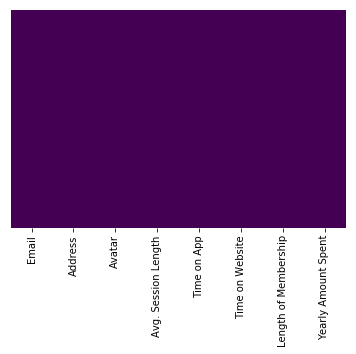

In [57]:
sns.heatmap(data=df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

# Data Analysis

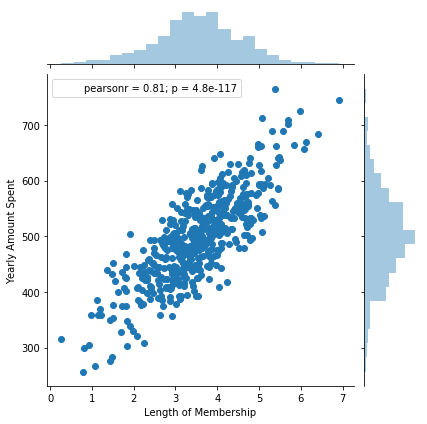

In [58]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [59]:
df['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com    87
gmail.com      87
yahoo.com      76
lee.com         2
jackson.com     2
Name: Email, dtype: int64

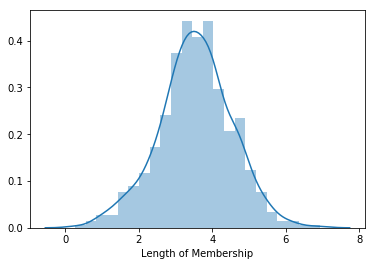

In [60]:
sns.distplot(df['Length of Membership'])

# Clean the data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [62]:
df.drop(['Email','Address','Avatar'],inplace=True,axis=True)

In [63]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [70]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]
y = df['Yearly Amount Spent']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lm = LinearRegression()

In [91]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
lm.coef_

array([ 26.07221637,  38.91454174,   0.93918168,  61.5414899 ])

In [92]:
predictions = lm.predict(x_test)

Text(0.5,1,'Y Test vs Predictions')

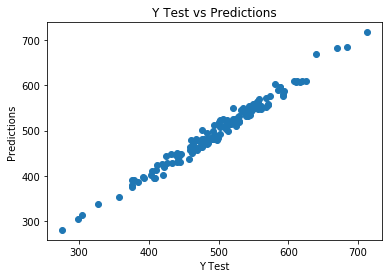

In [105]:
plt.scatter(x=y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.title('Y Test vs Predictions')

# What's our error like?

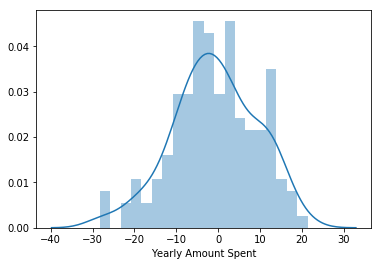

In [101]:
sns.distplot(y_test - predictions,bins=20)